<a href="https://www.kaggle.com/code/murtaza0125/imdb-sentiment-analysis-full?scriptVersionId=122775272" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
import nltk

In [3]:
from nltk.corpus import stopwords

In [4]:
from nltk.stem import PorterStemmer

In [5]:
ps = PorterStemmer()

In [6]:
import re #regular expression

In [7]:
from tqdm import tqdm

In [8]:
#Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
#Tfidf Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [11]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

In [12]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [13]:
from xgboost import XGBClassifier

In [14]:
from lightgbm import LGBMClassifier

In [15]:
!pip install catboost

In [16]:
from catboost import CatBoostClassifier

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df = pd.read_csv('/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv')

In [19]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [20]:
df.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


In [21]:
df.shape

(50000, 2)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [23]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [24]:
df.isna().sum()

review       0
sentiment    0
dtype: int64

In [25]:
df.isna().apply(pd.value_counts).T

,False
review,50000
sentiment,50000


In [26]:
#Corpus
df[['review']]

,review
0,One of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...
2,I thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...
4,"Petter Mattei's ""Love in the Time of Money"" is..."
...,...
49995,I thought this movie did a down right good job...
49996,"Bad plot, bad dialogue, bad acting, idiotic di..."
49997,I am a Catholic taught in parochial elementary...
49998,I'm going to have to disagree with the previou...


In [27]:
#1 Corpus - 50,000 Documents

In [28]:
df['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [29]:
df['sentiment'] = [1 if sentiment=='positive' else 0 for sentiment in df['sentiment']]

In [30]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [31]:
df.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0
49997,I am a Catholic taught in parochial elementary...,0
49998,I'm going to have to disagree with the previou...,0
49999,No one expects the Star Trek movies to be high...,0


In [32]:
df['sentiment'].value_counts()

1    25000
0    25000
Name: sentiment, dtype: int64

In [33]:
import warnings
warnings.filterwarnings('ignore')

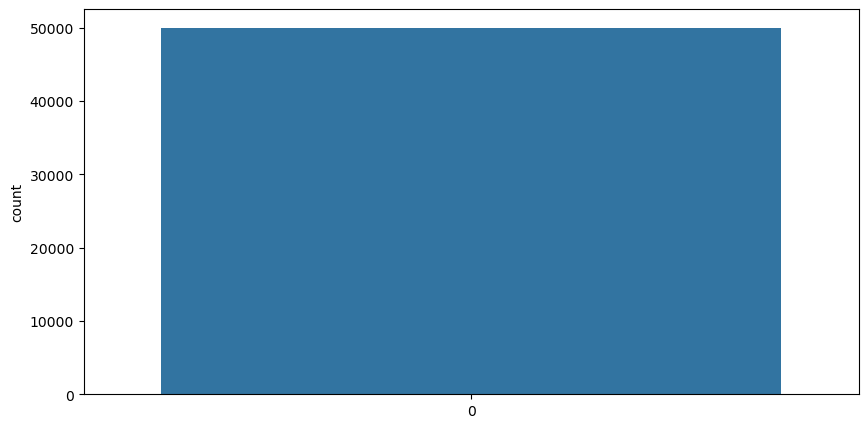

In [34]:
plt.figure(figsize=(10,5))
sns.countplot(df['sentiment'])
plt.show()

In [35]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Text Preprocessing

In [36]:
corpus=[]
for i in tqdm(range(0,len(df))):
  sentence = re.sub('[^a-zA-Z]',' ',df['review'][i]) #Read each and every sentence in the column
  sentence = sentence.lower()
  sentence = sentence.split()
  sentence = [ps.stem(word) for word in sentence if not word in stopwords.words('english')] 
  sentence = ' '.join(sentence)
  corpus.append(sentence)

100%|██████████| 50000/50000 [31:25<00:00, 26.51it/s]


In [37]:
corpus

['one review mention watch oz episod hook right exactli happen br br first thing struck oz brutal unflinch scene violenc set right word go trust show faint heart timid show pull punch regard drug sex violenc hardcor classic use word br br call oz nicknam given oswald maximum secur state penitentari focus mainli emerald citi experiment section prison cell glass front face inward privaci high agenda em citi home mani aryan muslim gangsta latino christian italian irish scuffl death stare dodgi deal shadi agreement never far away br br would say main appeal show due fact goe show dare forget pretti pictur paint mainstream audienc forget charm forget romanc oz mess around first episod ever saw struck nasti surreal say readi watch develop tast oz got accustom high level graphic violenc violenc injustic crook guard sold nickel inmat kill order get away well manner middl class inmat turn prison bitch due lack street skill prison experi watch oz may becom comfort uncomfort view that get touch d

In [38]:
type(corpus)

list

In [39]:
len(corpus)

50000

In [40]:
cv = CountVectorizer(max_features=2500)

In [41]:
#Independent Variable
X1 = cv.fit_transform(corpus).toarray()

In [42]:
X1

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [43]:
X1.shape

(50000, 2500)

In [44]:
50000*2500

125000000

In [45]:
type(X1)

numpy.ndarray

In [46]:
np.max(X1)

160

In [47]:
np.min(X1)

0

In [48]:
#Dependent Variable
y1 = pd.get_dummies(df['sentiment'])
y1 = y1.iloc[:,1].values

In [49]:
y1.shape

(50000,)

In [50]:
y1

array([1, 1, 1, ..., 0, 0, 0], dtype=uint8)

In [51]:
X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y1,test_size=0.2,random_state=1) #80:20 split

In [52]:
X1_train.shape

(40000, 2500)

In [53]:
X1_test.shape

(10000, 2500)

In [54]:
y1_train.shape

(40000,)

In [55]:
y1_test.shape

(10000,)

In [56]:
nb = MultinomialNB() #Object of class Multinomial Naive Bayes

In [57]:
nb.fit(X1_train,y1_train) #Train the model Multinomial NB

MultinomialNB()

In [58]:
nb_pred = nb.predict(X1_test)

In [59]:
nb_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=uint8)

In [60]:
accuracy_score(y1_test,nb_pred)*100

84.42

In [61]:
print(classification_report(y1_test,nb_pred))

              precision    recall  f1-score   support

           0       0.85      0.84      0.85      5044
           1       0.84      0.85      0.84      4956

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



In [62]:
cf_nb_bow = confusion_matrix(y1_test,nb_pred)

In [63]:
cf_nb_bow

array([[4247,  797],
       [ 761, 4195]])

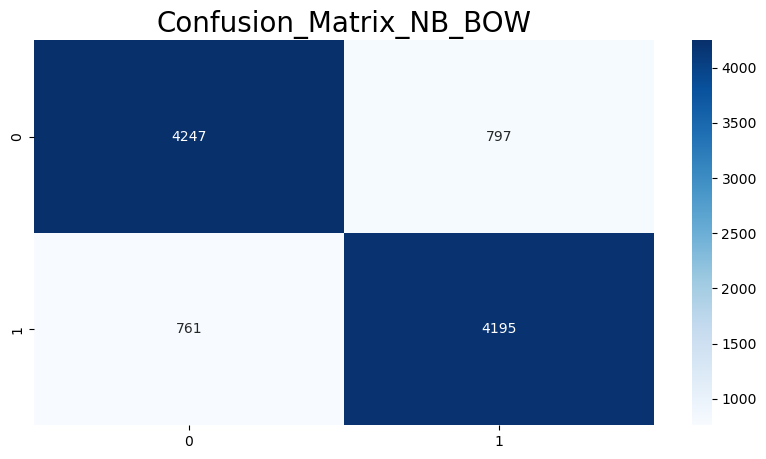

In [64]:
#Plotting of confusion matrix
plt.figure(figsize=(10,5))
plt.title('Confusion_Matrix_NB_BOW',fontsize=20)
sns.heatmap(cf_nb_bow,annot=True,cmap='Blues',fmt='g')
plt.show()

In [65]:
rf = RandomForestClassifier(n_estimators=100,criterion='entropy',max_depth=10)

In [66]:
rf.fit(X1_train,y1_train)

RandomForestClassifier(criterion='entropy', max_depth=10)

In [67]:
rf_pred = rf.predict(X1_test)

In [68]:
rf_pred

array([0, 0, 0, ..., 1, 1, 0], dtype=uint8)

In [69]:
accuracy_score(y1_test,rf_pred)*100

81.69

In [70]:
rf.score(X1_train,y1_train)*100

84.66749999999999

In [71]:
from xgboost import XGBClassifier

In [72]:
xgbc = XGBClassifier()

In [73]:
# xgbc.fit(X1_train,y1_train)

In [74]:
# xgbc_pred = xgbc.predict(X1_test)

In [75]:
from lightgbm import LGBMClassifier

In [76]:
lgb = LGBMClassifier()

In [77]:
lgb.fit(X1_train,y1_train)

LGBMClassifier()

In [78]:
lgb_pred = lgb.predict(X1_test)

In [79]:
accuracy_score(y1_test,lgb_pred)*100

86.07000000000001

In [80]:
lgb.score(X1_train,y1_train)*100

88.5475

In [81]:
print(classification_report(y1_test,lgb_pred))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86      5044
           1       0.85      0.88      0.86      4956

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [82]:
cf_lgb = confusion_matrix(y1_test,lgb_pred)

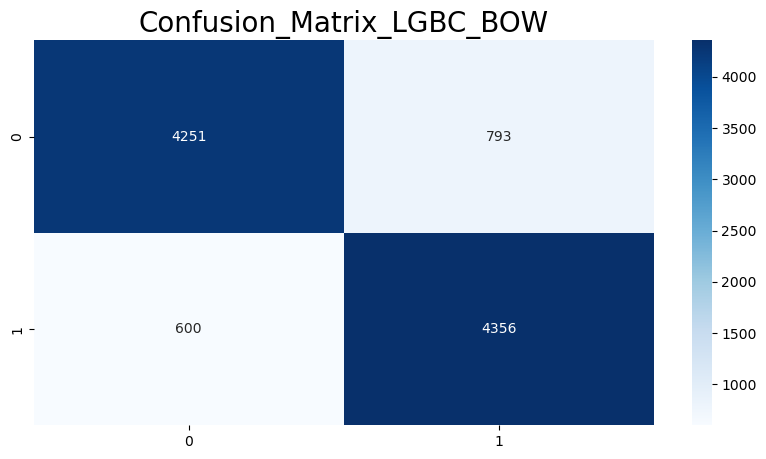

In [83]:
#Plotting of confusion matrix
plt.figure(figsize=(10,5))
plt.title('Confusion_Matrix_LGBC_BOW',fontsize=20)
sns.heatmap(cf_lgb,annot=True,cmap='Blues',fmt='g')
plt.show()

In [84]:
ctb = CatBoostClassifier()

In [85]:
ctb.fit(X1_train,y1_train)

Learning rate set to 0.049775
0:	learn: 0.6774713	total: 288ms	remaining: 4m 47s
1:	learn: 0.6636997	total: 500ms	remaining: 4m 9s
2:	learn: 0.6511010	total: 714ms	remaining: 3m 57s
3:	learn: 0.6408039	total: 907ms	remaining: 3m 45s
4:	learn: 0.6303704	total: 1.12s	remaining: 3m 42s
5:	learn: 0.6216442	total: 1.32s	remaining: 3m 38s
6:	learn: 0.6138303	total: 1.53s	remaining: 3m 37s
7:	learn: 0.6065806	total: 1.74s	remaining: 3m 35s
8:	learn: 0.6006425	total: 1.97s	remaining: 3m 36s
9:	learn: 0.5950010	total: 2.18s	remaining: 3m 35s
10:	learn: 0.5896720	total: 2.4s	remaining: 3m 35s
11:	learn: 0.5845531	total: 2.58s	remaining: 3m 32s
12:	learn: 0.5795520	total: 2.78s	remaining: 3m 31s
13:	learn: 0.5750047	total: 2.95s	remaining: 3m 27s
14:	learn: 0.5711851	total: 3.15s	remaining: 3m 26s
15:	learn: 0.5669317	total: 3.36s	remaining: 3m 26s
16:	learn: 0.5634148	total: 3.57s	remaining: 3m 26s
17:	learn: 0.5596142	total: 3.75s	remaining: 3m 24s
18:	learn: 0.5563439	total: 3.95s	remaining: 3

In [86]:
ctb_pred = ctb.predict(X1_test)

In [87]:
accuracy_score(y1_test,ctb_pred)*100

87.03999999999999

In [88]:
print(classification_report(y1_test,ctb_pred))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87      5044
           1       0.85      0.89      0.87      4956

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



In [89]:
ctb.score(X1_train,y1_train)*100

90.9125

In [90]:
cf_ctb_bow = confusion_matrix(y1_test,ctb_pred)

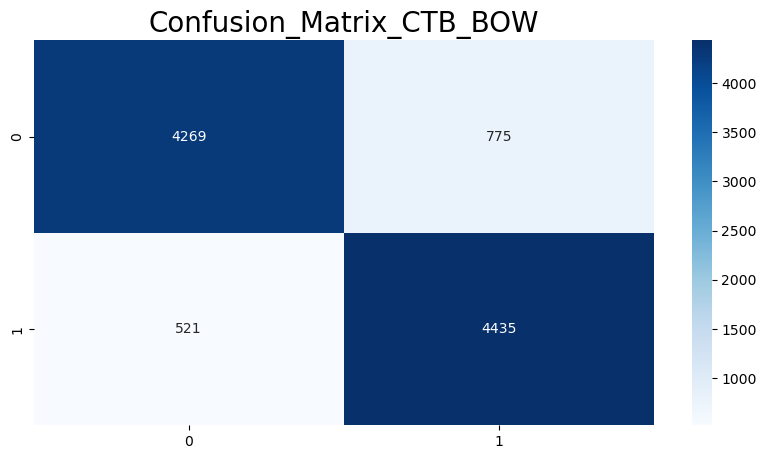

In [91]:
#Plotting of confusion matrix
plt.figure(figsize=(10,5))
plt.title('Confusion_Matrix_CTB_BOW',fontsize=20)
sns.heatmap(cf_ctb_bow,annot=True,cmap='Blues',fmt='g')
plt.show()

# Tf-Idf Vectorizer

In [92]:
#object class of tfidf vectorizer
tfidf = TfidfVectorizer(max_features=2500)

In [93]:
X2 = tfidf.fit_transform(corpus).toarray() #Independent features for tfidf

In [94]:
X2.shape

(50000, 2500)

In [95]:
X2

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [96]:
np.max(X2) #tfidf range from 0 to +1

0.9327559712776132

In [97]:
np.min(X2)

0.0

In [98]:
#Dependent features for tfidf 
y2 = pd.get_dummies(df['sentiment'])
y2 = y2.iloc[:,1].values

In [99]:
X2_train,X2_test,y2_train,y2_test = train_test_split(X2,y2,test_size=0.2,random_state=1)

In [100]:
X2_train.shape

(40000, 2500)

In [101]:
X2_test.shape

(10000, 2500)

In [102]:
y2_train.shape

(40000,)

In [103]:
y2_test.shape

(10000,)

In [104]:
nb.fit(X2_train,y2_train) #Train the model Multinomial NB

MultinomialNB()

In [105]:
nb_pred = nb.predict(X2_test)

In [106]:
accuracy_score(y2_test,nb_pred)*100

85.09

In [107]:
print(classification_report(y2_test,nb_pred))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      5044
           1       0.84      0.86      0.85      4956

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [108]:
cf_nb_tfidf = confusion_matrix(y2_test,nb_pred)

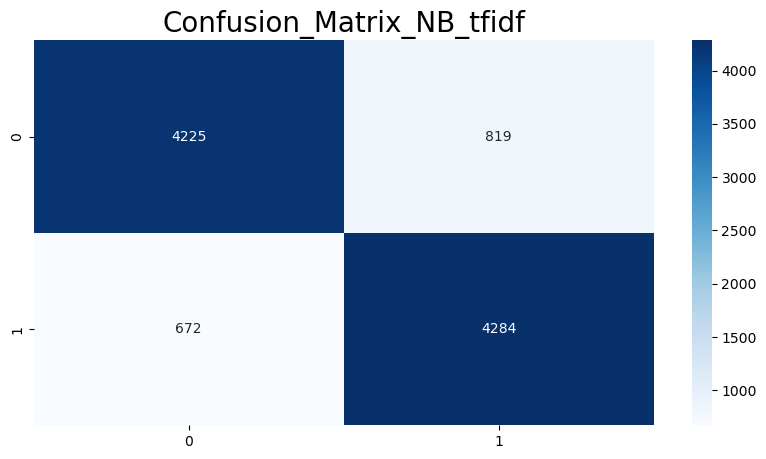

In [109]:
#Plotting of confusion matrix
plt.figure(figsize=(10,5))
plt.title('Confusion_Matrix_NB_tfidf',fontsize=20)
sns.heatmap(cf_nb_tfidf,annot=True,cmap='Blues',fmt='g')
plt.show()

In [110]:
rf.fit(X2_train,y2_train)

RandomForestClassifier(criterion='entropy', max_depth=10)

In [111]:
rf_pred = rf.predict(X2_test)

In [112]:
accuracy_score(y2_test,rf_pred)*100

81.88

In [113]:
rf.score(X2_train,y2_train)*100

84.8725

In [114]:
print(classification_report(y2_test,rf_pred))

              precision    recall  f1-score   support

           0       0.87      0.75      0.81      5044
           1       0.78      0.89      0.83      4956

    accuracy                           0.82     10000
   macro avg       0.83      0.82      0.82     10000
weighted avg       0.83      0.82      0.82     10000



In [115]:
cf_rf_tfidf = confusion_matrix(y2_test,rf_pred)

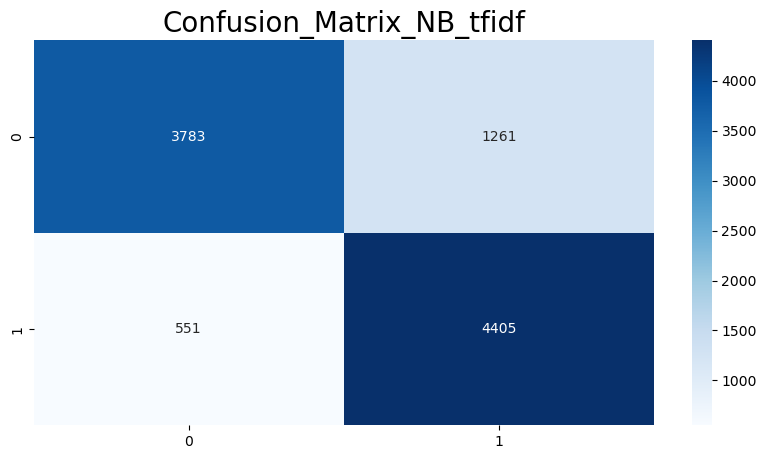

In [116]:
#Plotting of confusion matrix
plt.figure(figsize=(10,5))
plt.title('Confusion_Matrix_NB_tfidf',fontsize=20)
sns.heatmap(cf_rf_tfidf,annot=True,cmap='Blues',fmt='g')
plt.show()

In [117]:
# xgbc.fit(X2_train,y2_train)

In [118]:
lgb.fit(X2_train,y2_train)

LGBMClassifier()

In [119]:
lgb_pred = lgb.predict(X2_test)

In [120]:
accuracy_score(y2_test,lgb_pred)*100

85.95

In [121]:
print(classification_report(y2_test,lgb_pred))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86      5044
           1       0.84      0.88      0.86      4956

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [122]:
cf_lgb_tfidf = confusion_matrix(y2_test,lgb_pred)

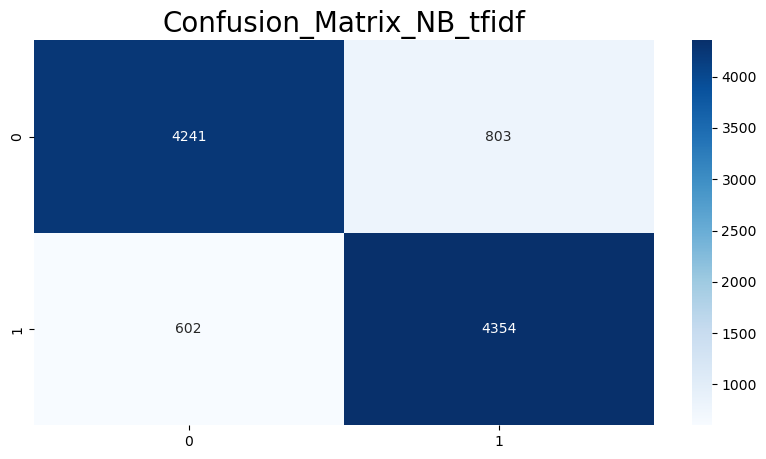

In [123]:
#Plotting of confusion matrix
plt.figure(figsize=(10,5))
plt.title('Confusion_Matrix_NB_tfidf',fontsize=20)
sns.heatmap(cf_lgb_tfidf,annot=True,cmap='Blues',fmt='g')
plt.show()

In [124]:
ctb.fit(X2_train,y2_train)

Learning rate set to 0.049775
0:	learn: 0.6772015	total: 832ms	remaining: 13m 50s
1:	learn: 0.6633070	total: 1.43s	remaining: 11m 51s
2:	learn: 0.6512870	total: 1.97s	remaining: 10m 55s
3:	learn: 0.6404928	total: 2.41s	remaining: 10m 1s
4:	learn: 0.6308294	total: 2.87s	remaining: 9m 30s
5:	learn: 0.6226630	total: 3.31s	remaining: 9m 7s
6:	learn: 0.6150807	total: 3.75s	remaining: 8m 52s
7:	learn: 0.6072891	total: 4.2s	remaining: 8m 41s
8:	learn: 0.6010322	total: 4.68s	remaining: 8m 35s
9:	learn: 0.5954858	total: 5.13s	remaining: 8m 28s
10:	learn: 0.5897571	total: 5.56s	remaining: 8m 20s
11:	learn: 0.5844472	total: 6.01s	remaining: 8m 14s
12:	learn: 0.5793709	total: 6.46s	remaining: 8m 10s
13:	learn: 0.5745383	total: 6.89s	remaining: 8m 5s
14:	learn: 0.5704635	total: 7.37s	remaining: 8m 3s
15:	learn: 0.5665133	total: 7.83s	remaining: 8m 1s
16:	learn: 0.5628830	total: 8.3s	remaining: 7m 59s
17:	learn: 0.5589164	total: 8.77s	remaining: 7m 58s
18:	learn: 0.5555907	total: 9.24s	remaining: 7m

In [125]:
ctb_pred = ctb.predict(X2_test)

In [126]:
accuracy_score(y2_test,ctb_pred)*100

86.92

In [127]:
print(classification_report(y2_test,ctb_pred))

              precision    recall  f1-score   support

           0       0.89      0.84      0.87      5044
           1       0.85      0.89      0.87      4956

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



In [128]:
cf_ctb_tfidf = confusion_matrix(y2_test,ctb_pred)

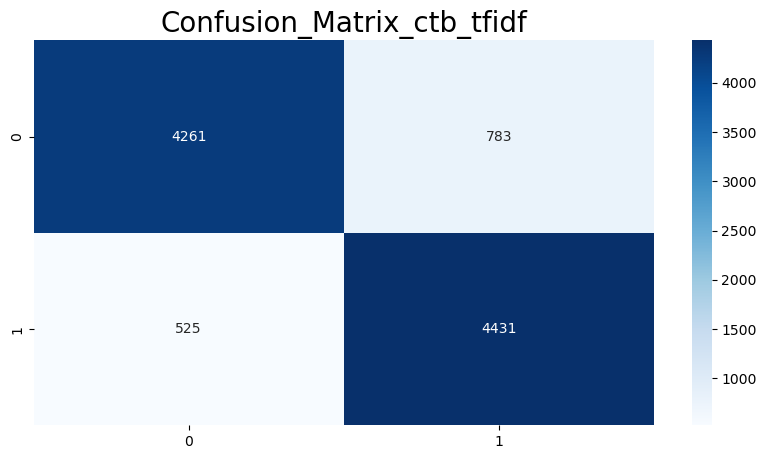

In [129]:
#Plotting of confusion matrix
plt.figure(figsize=(10,5))
plt.title('Confusion_Matrix_ctb_tfidf',fontsize=20)
sns.heatmap(cf_ctb_tfidf,annot=True,cmap='Blues',fmt='g')
plt.show()